In [3]:
# Importing required libraries for the project

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.express as pt

In [4]:
aircraft = pd.read_csv('Flight Fare.csv')
aircraft

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
aircraft = aircraft.drop(['Unnamed: 0'], axis = 1)

In [6]:
aircraft.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [7]:
aircraft.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
aircraft.head(20)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [9]:
aircraft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [10]:
aircraft.shape

(300153, 11)

In [11]:
aircraft.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [15]:
aeroplane=aircraft.groupby(['flight','airline'],as_index=False).count()
aeroplane.airline.value_counts()
aircraft

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


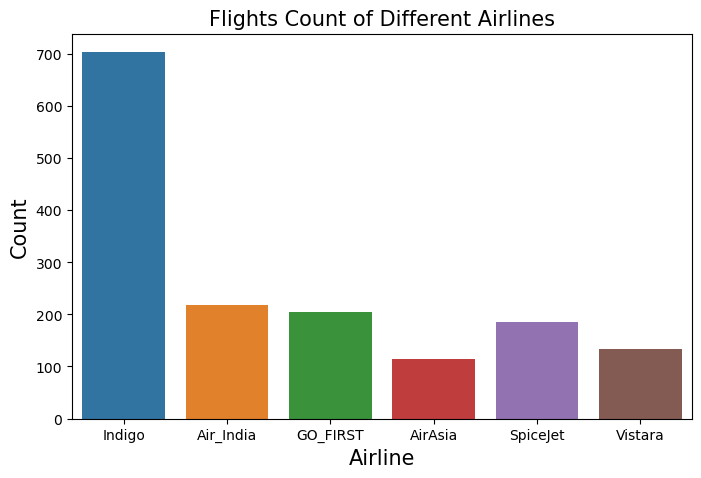

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'airline', data = aeroplane)
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

# Inference

* Indigo becoming as a most popular Airline

Text(0.5, 1.0, 'Ticket Price Of Airlines')

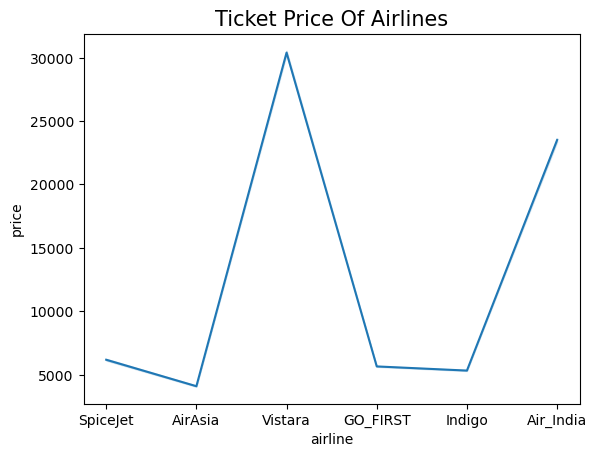

In [14]:
sns.lineplot(data = aircraft, x="airline", y="price")
plt.title('Ticket Price Of Airlines',fontsize = 15)

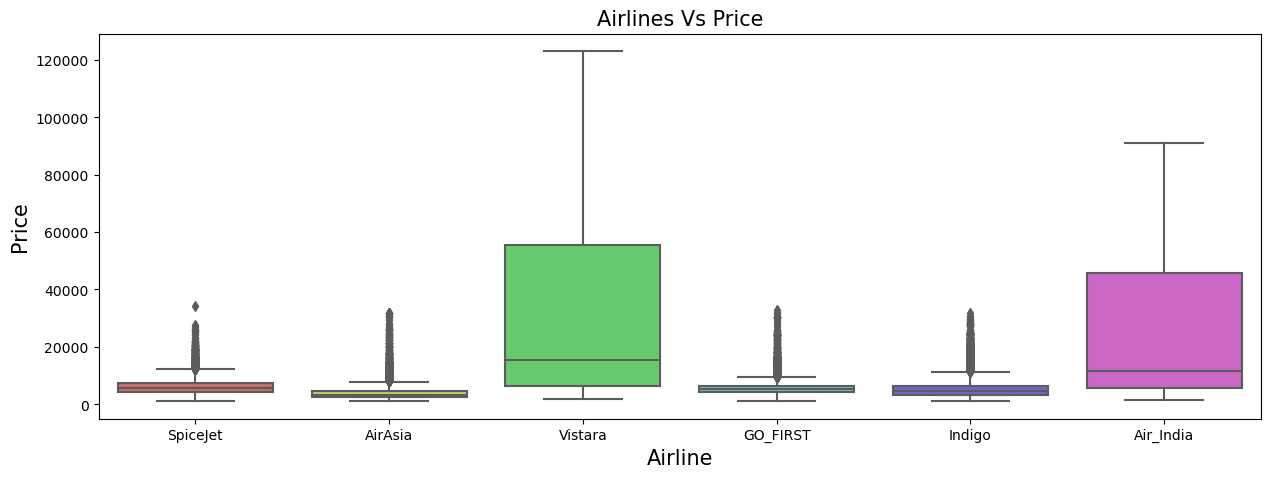

In [55]:
plt.figure(figsize=(15,5))
sns.boxplot(x=aircraft['airline'],y=aircraft['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# Insights

* From the above lineplot, we can able to understand that ticket price of airline vistara is highest followed by air_india.
* Then the remaining airlines such as spicejet,airasia,go_first and indigo have similar price range.

In [53]:
jet=aircraft.groupby(['flight','airline','class'],as_index=False).count()
jet['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

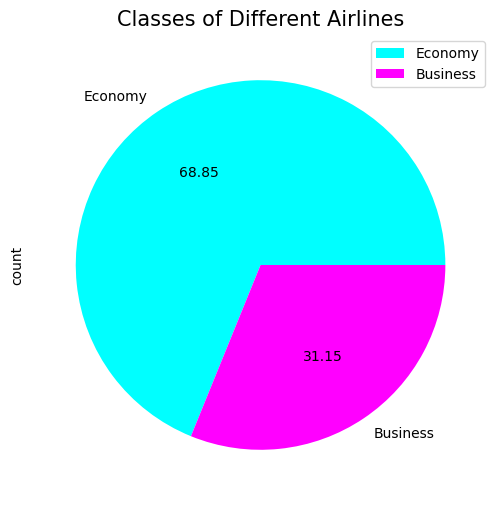

In [54]:
plt.figure(figsize=(8,6))
aircraft['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

# Insights

* As we can see,compared to number of Business class tickets the number of economy class tickets are higher in most of the airlines

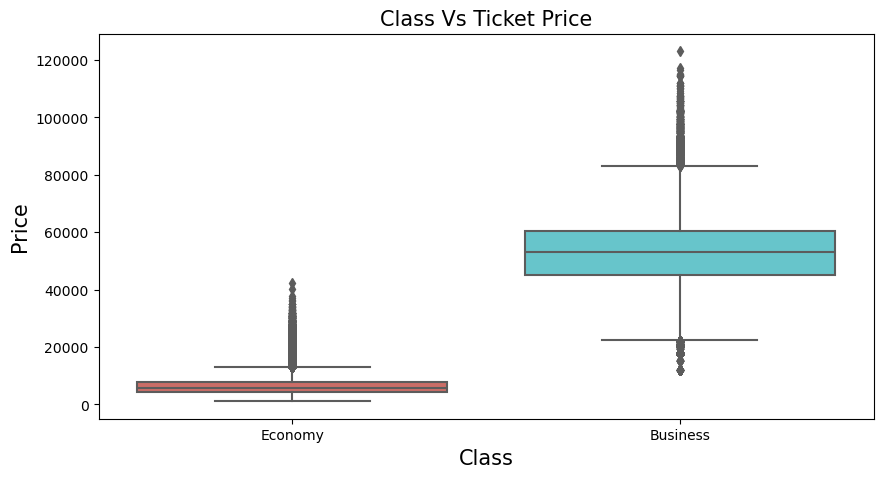

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=aircraft,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

How Does the Ticket Price vary between Economy and Business Class?

Ticket Price is Maximum for Bussiness Class When compared to Economy Class

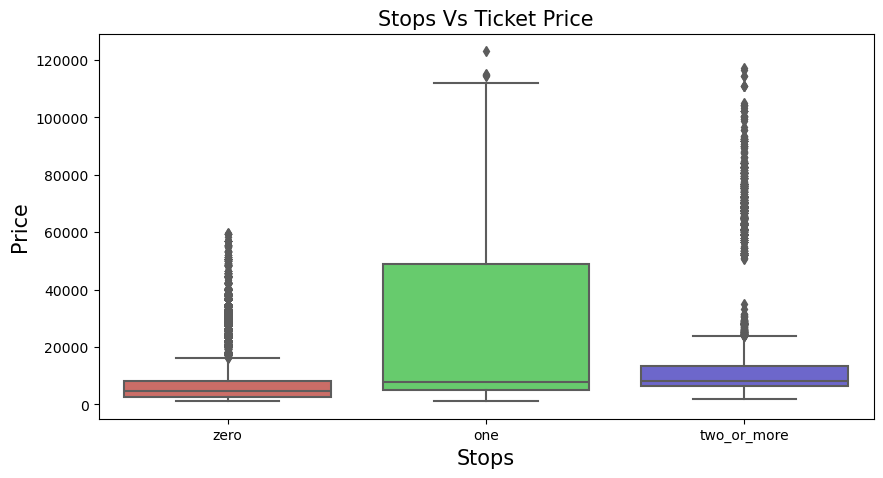

In [57]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=aircraft,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

How Does the Ticket Price vary with the number of stops of a Flight?

* Flights having one stop has maximum ticket price

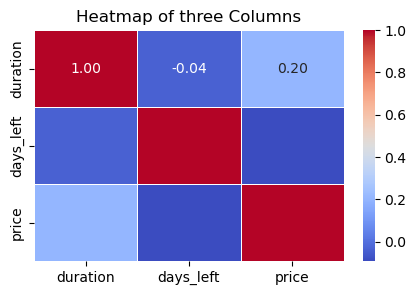

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [100]:
# Select specific columns
selected_columns = ['duration', 'days_left', 'price']
df_selected = aircraft[selected_columns]

# Compute the correlation matrix (if needed)
correlation_matrix = df_selected.corr()

# plot the heatmap
plt.figure(figsize = (5,3))
sns.heatmap(correlation_matrix, annot =True, cmap = 'coolwarm', linewidth = .5, fmt = ".2f")
plt.title('Heatmap of three Columns')
plt.show()
df_selected.corr()


# Insights

* Duration and Days Left: Weak or no correlation (near 0, light color)
* Duration and Price: Moderate positive correlation (around 0.2, light red)
* Days Left and Price: Strong negative correlation (around -0.09, dark blue)

* By interpreting these correlations, airlines can enhance their pricing strategies, improve marketing efforts, and optimize operational efficiency. Understanding these relationships allows for more informed decision-making, leading to better business outcomes and customer satisfaction.

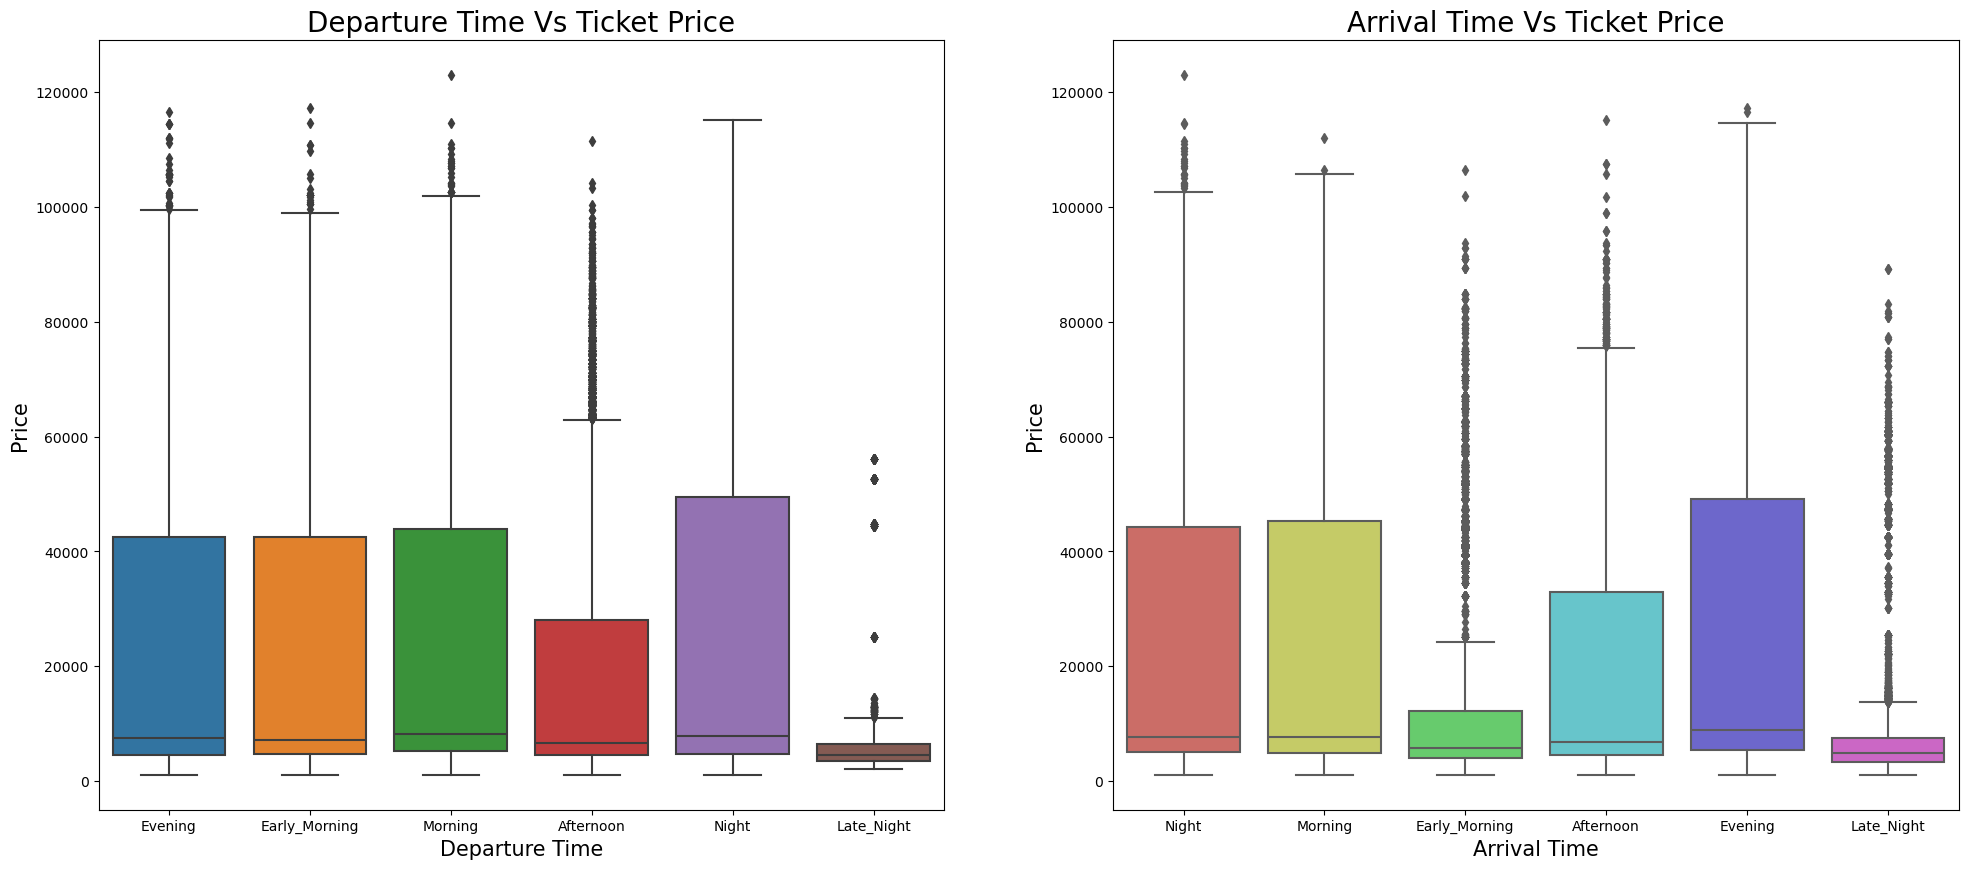

In [58]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=aircraft)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=aircraft,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

How the Ticket Price change based on the Departure Time and Arrival Time?
1. Departure Time Vs Ticket Price

* Ticket Price is More for the Flights when the Departure Time is at Night
* Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening
* Ticket Price is Low for the Flights Having Departure Time at Late_night
2. Arrival Time Vs Ticket Price
  
* Ticket Price is More for the Flights when the Arrival Time is at Evening
* Ticket Price is almost equal for flights Having Arrival time is at Morning and Night
* Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time

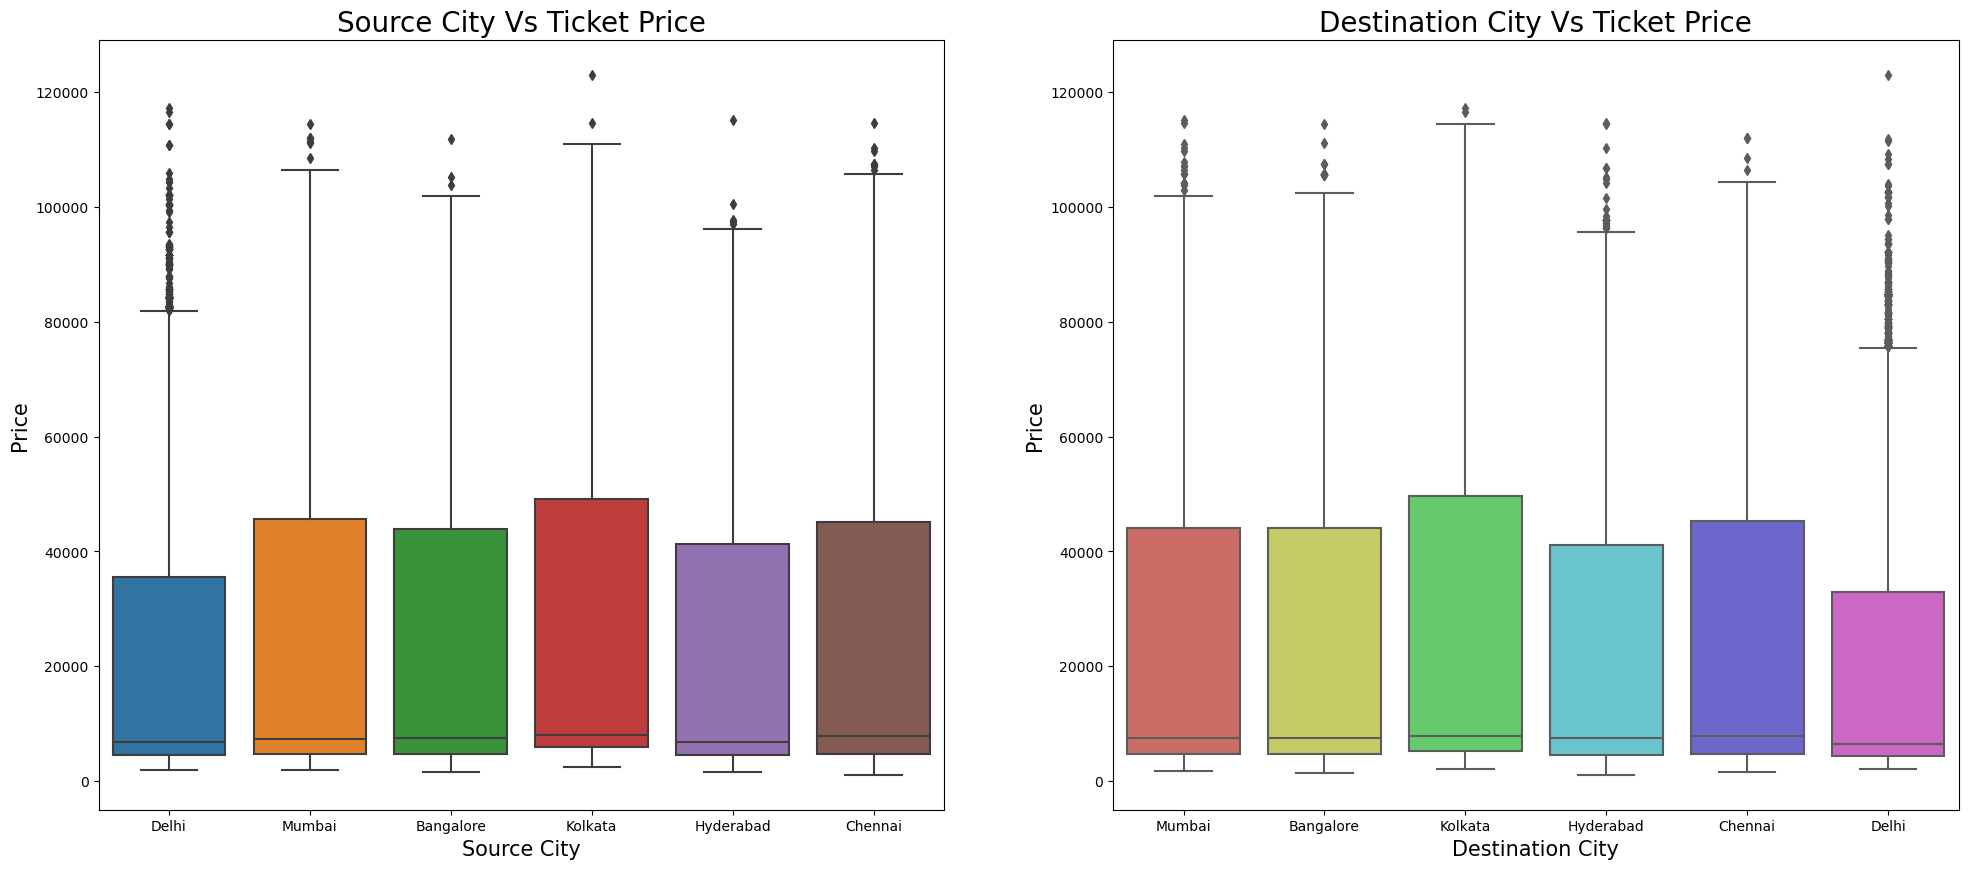

In [59]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=aircraft)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=aircraft,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

How the price changes with change in Source city and Destination city?
1. Source City Vs Ticket Price

* Ticket Price is More for the Flights whose Source City is Kolkata
* Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai , Hyderabad and Bangalore
* Ticket Price is Low for the Flights Having Source City as Delhi

2. Destination City Vs Ticket Price
* Ticket Price is More for the Flights whose Destination City is kolkata and Chennai
* Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore
* Ticket Price is Low for the Flights Having Destination City as Delhi

# Statistics

In [60]:
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

observed = pd.crosstab(index = aircraft['airline'], columns = aircraft['class'],margins = True)
observed

class,Business,Economy,All
airline,,,
AirAsia,0,16098,16098
Air_India,32898,47994,80892
GO_FIRST,0,23173,23173
Indigo,0,43120,43120
SpiceJet,0,9011,9011
Vistara,60589,67270,127859
All,93487,206666,300153


In [61]:
import numpy as np
from scipy.stats import chi2_contingency

chi2_contingency(observed,correction = False)

Chi2ContingencyResult(statistic=60492.80487209429, pvalue=0.0, dof=12, expected_freq=array([[  5013.9553028 ,  11084.0446972 ,  16098.        ],
       [ 25194.98523753,  55697.01476247,  80892.        ],
       [  7217.5665444 ,  15955.4334556 ,  23173.        ],
       [ 13430.34865552,  29689.65134448,  43120.        ],
       [  2806.60648736,   6204.39351264,   9011.        ],
       [ 39823.5377724 ,  88035.4622276 , 127859.        ],
       [ 93487.        , 206666.        , 300153.        ]]))

#### Insights :
* The p-value of 0.0 indicates a very strong evidence reject the null hypothesis, implying that there is a significant association between the airline and the class of passengers. This means that the distribution of passengers in Business and Economy classes is not independent of the airline.

* The high Chi-square statistic (60492.80) suggests a large deviation between the observed and expected frequencies, confirming the strong association between the airline type and passenger class.

* The Chi-square test indicates a significant relationship between the airline and the class of passengers, highlighting distinct market strategies among different airlines.

In [89]:
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

observed = pd.crosstab(index = aircraft['source_city'], columns = aircraft['destination_city'],margins = True)
observed

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,All
source_city,,,,,,,
Bangalore,0,6410,13756,8928,10028,12939,52061
Chennai,6493,0,9783,6103,6983,9338,38700
Delhi,14012,10780,0,9328,11934,15289,61343
Hyderabad,7854,6395,8506,0,7987,10064,40806
Kolkata,9824,6653,10506,7897,0,11467,46347
Mumbai,12885,10130,14809,10470,12602,0,60896
All,51068,40368,57360,42726,49534,59097,300153


In [90]:
import numpy as np
from scipy.stats import chi2_contingency

chi2_contingency(observed,correction = False)

Chi2ContingencyResult(statistic=64203.01400547533, pvalue=0.0, dof=36, expected_freq=array([[  8857.65309026,   7001.7572638 ,   9948.9892155 ,
          7410.74813845,   8591.58353906,  10250.26875294,
         52061.        ],
       [  6584.41394889,   5204.81754305,   7395.66820921,
          5508.84448931,   6386.6288193 ,   7619.62699023,
         38700.        ],
       [ 10436.89159862,   8250.10652567,  11722.80297049,
          8732.01673147,  10123.38428068,  12077.79789307,
         61343.        ],
       [  6942.72856843,   5488.05645121,   7798.13015362,
          5808.62811966,   6734.18024807,   8034.27645901,
         40806.        ],
       [  7885.4737284 ,   6233.27335059,   8857.02931505,
          6597.37507871,   7648.6068705 ,   9125.24165676,
         46347.        ],
       [ 10360.83906541,   8189.98886568,  11637.38013613,
          8668.3874424 ,  10049.61624238,  11989.78824799,
         60896.        ],
       [ 51068.        ,  40368.        ,  57360.  

# Inference

* p-value: The p-value is 0.0 (or extremely close to 0, below the machine precision limit). This indicates strong evidence against the null hypothesis, suggesting that the variables are not independent.

* The chi-square test indicates a significant association between source and destination cities, revealing important patterns in flight frequencies. These insights can help airlines optimize their operations, allocate resources more efficiently, and tailor their strategies to meet market demand. Understanding these patterns enables data-driven decision-making, enhancing both operational efficiency and customer satisfaction.
